In [15]:
import quandl
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
quandl.ApiConfig.api_key = "FqjcQ6Wyxf36_2fPqqUg"

In [2]:
AAPL = quandl.get("WIKI/AAPL")

In [3]:
AAPL

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.750,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.250,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.250,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.870,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.630,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0


In [8]:
AAPL.iloc[-1,:]

Open                173.68
High                175.15
Low                 166.92
Close               168.34
Volume         38962839.00
Ex-Dividend           0.00
Split Ratio           1.00
Adj. Open           173.68
Adj. High           175.15
Adj. Low            166.92
Adj. Close          168.34
Adj. Volume    38962839.00
Name: 2018-03-27 00:00:00, dtype: float64

In [28]:
AAPL.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=9400, freq=None)

In [29]:
start_date = "2006-10-2"
end_date = "2011-12-30"
after_start_date = AAPL.index >= start_date
before_end_date = AAPL.index <= end_date
between_two_dates = after_start_date & before_end_date
AAPL = AAPL.loc[between_two_dates]

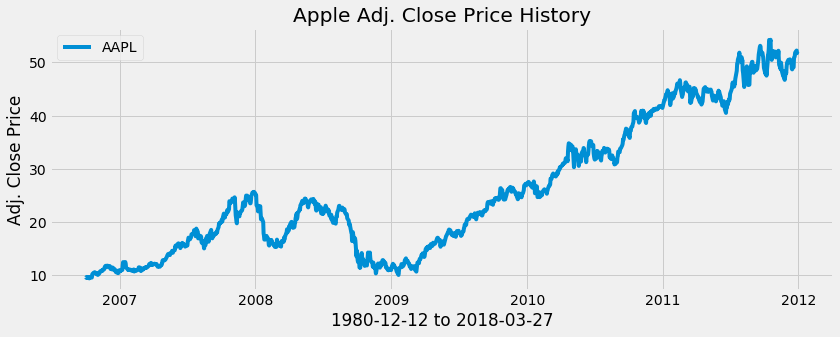

In [30]:
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj. Close'], label='AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('1980-12-12 to 2018-03-27')
plt.ylabel('Adj. Close Price')
plt.legend(loc='upper left')
plt.show()

In [37]:
SMA30 = pd.DataFrame()
SMA30['Adj. Close'] = AAPL['Adj. Close'].rolling(window=30).mean()
SMA30

,Adj. Close
Date,
2006-10-02,NaN
2006-10-03,NaN
2006-10-04,NaN
2006-10-05,NaN
2006-10-06,NaN
...,...
2011-12-23,49.390798
2011-12-27,49.484656
2011-12-28,49.584811


In [38]:
SMA100 = pd.DataFrame()
SMA100['Adj. Close'] = AAPL['Adj. Close'].rolling(window=100).mean()
SMA100

,Adj. Close
Date,
2006-10-02,NaN
2006-10-03,NaN
2006-10-04,NaN
2006-10-05,NaN
2006-10-06,NaN
...,...
2011-12-23,49.843957
2011-12-27,49.881432
2011-12-28,49.918727


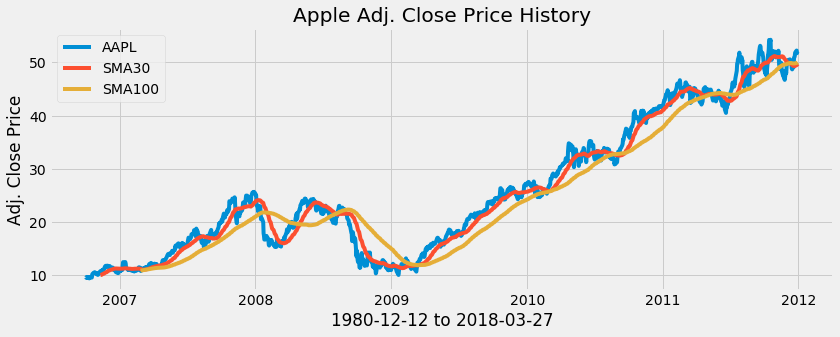

In [39]:
plt.figure(figsize=(12.5,4.5))
plt.plot(AAPL['Adj. Close'], label='AAPL')
plt.plot(SMA30['Adj. Close'], label='SMA30')
plt.plot(SMA100['Adj. Close'], label='SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('1980-12-12 to 2018-03-27')
plt.ylabel('Adj. Close Price')
plt.legend(loc='upper left')
plt.show()

In [41]:
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj. Close']
data['SMA30'] = SMA30['Adj. Close']
data['SMA100'] = SMA100['Adj. Close']
data

,AAPL,SMA30,SMA100
Date,,,
2006-10-02,9.620553,NaN,NaN
2006-10-03,9.519027,NaN,NaN
2006-10-04,9.687381,NaN,NaN
2006-10-05,9.616698,NaN,NaN
2006-10-06,9.538304,NaN,NaN
...,...,...,...
2011-12-23,51.833526,49.390798,49.843957
2011-12-27,52.244771,49.484656,49.881432
2011-12-28,51.744852,49.584811,49.918727


In [47]:
def buy_sell(data):
    buySig = []
    sellSig = []
    flag = -1
    
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                buySig.append(data['AAPL'][i])
                sellSig.append(np.nan)
                flag = 1
            else:
                buySig.append(np.nan)
                sellSig.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                buySig.append(np.nan)
                sellSig.append(data['AAPL'][i])
                flag = 0
            else:
                buySig.append(np.nan)
                sellSig.append(np.nan)
        else:
            buySig.append(np.nan)
            sellSig.append(np.nan)
    return (buySig, sellSig)

In [48]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [49]:
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2006-10-02,9.620553,NaN,NaN,NaN,NaN
2006-10-03,9.519027,NaN,NaN,NaN,NaN
2006-10-04,9.687381,NaN,NaN,NaN,NaN
2006-10-05,9.616698,NaN,NaN,NaN,NaN
2006-10-06,9.538304,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2011-12-23,51.833526,49.390798,49.843957,NaN,NaN
2011-12-27,52.244771,49.484656,49.881432,NaN,NaN
2011-12-28,51.744852,49.584811,49.918727,NaN,NaN


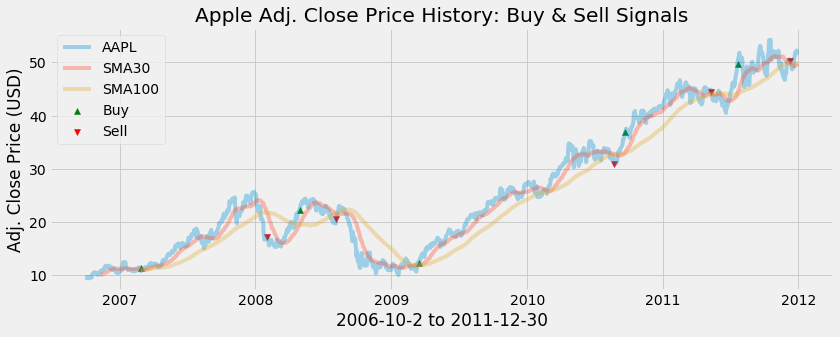

In [51]:
plt.figure(figsize=(12.5,4.5))
plt.plot(data['AAPL'], label='AAPL', alpha=0.35)
plt.plot(data['SMA30'], label='SMA30', alpha=0.35)
plt.plot(data['SMA100'], label='SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy', marker='^', color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell', marker='v', color='red')
plt.title('Apple Adj. Close Price History: Buy & Sell Signals')
plt.xlabel('2006-10-2 to 2011-12-30')
plt.ylabel('Adj. Close Price (USD)')
plt.legend(loc='upper left')
plt.show()